In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

#plotting style
sns.set(style="whitegrid")

In [2]:
# Load the Iris dataset
iris = load_iris()

# For this task, we will only use the first two features (sepal length and sepal width)
# This is so we can easily visualize the decision boundaries in 2D.
X = iris.data[:, :2] 
y = iris.target

# Convert to a DataFrame for easier viewing 
df = pd.DataFrame(data=X, columns=['sepal length (cm)', 'sepal width (cm)'])
df['target'] = y
print("Dataset loaded successfully (using only 2 features for visualization).")
display(df.head())
print("\nTarget classes:", iris.target_names)


# --- Train/Test Split and Normalize Features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData split and features normalized.")

Dataset loaded successfully (using only 2 features for visualization).


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



Target classes: ['setosa' 'versicolor' 'virginica']

Data split and features normalized.


KNN model trained with K=5.


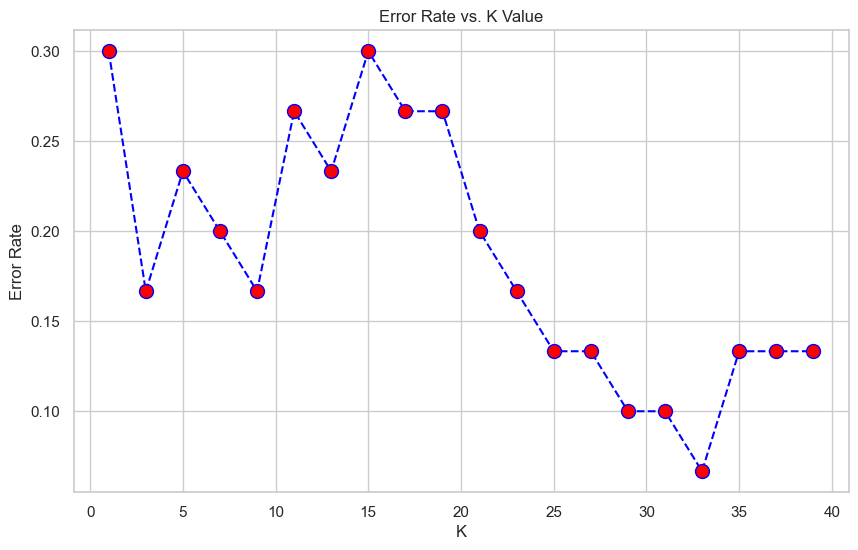


The optimal value of K is found to be: 33


In [3]:
# --- Train a KNN model with a specific K ---
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
print(f"KNN model trained with K={k}.")

# --- Experiment with different values of K ---
# We will find the best K value by trying a range of odd numbers
error_rate = []
k_range = range(1, 40, 2) # Trying odd K values from 1 to 39

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate vs. K value
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Find the K with the minimum error
best_k = k_range[np.argmin(error_rate)]
print(f"\nThe optimal value of K is found to be: {best_k}")

Accuracy of the final model (K=33): 0.93


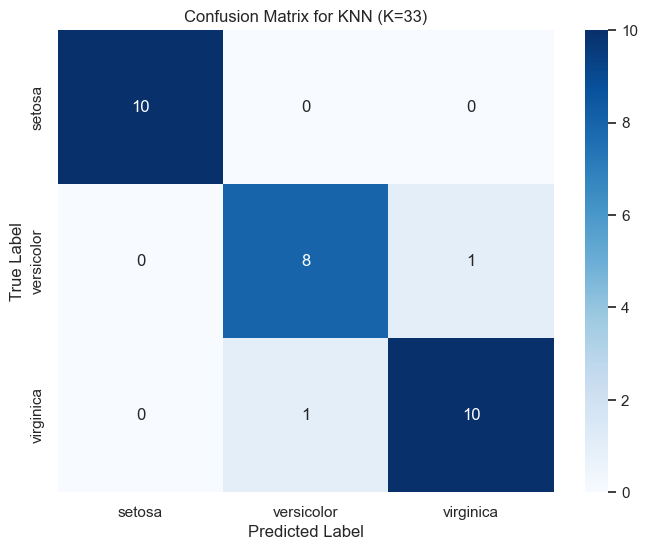

In [4]:
# Train the final model with the optimal K
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the final model (K={best_k}): {accuracy:.2f}")

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.show()

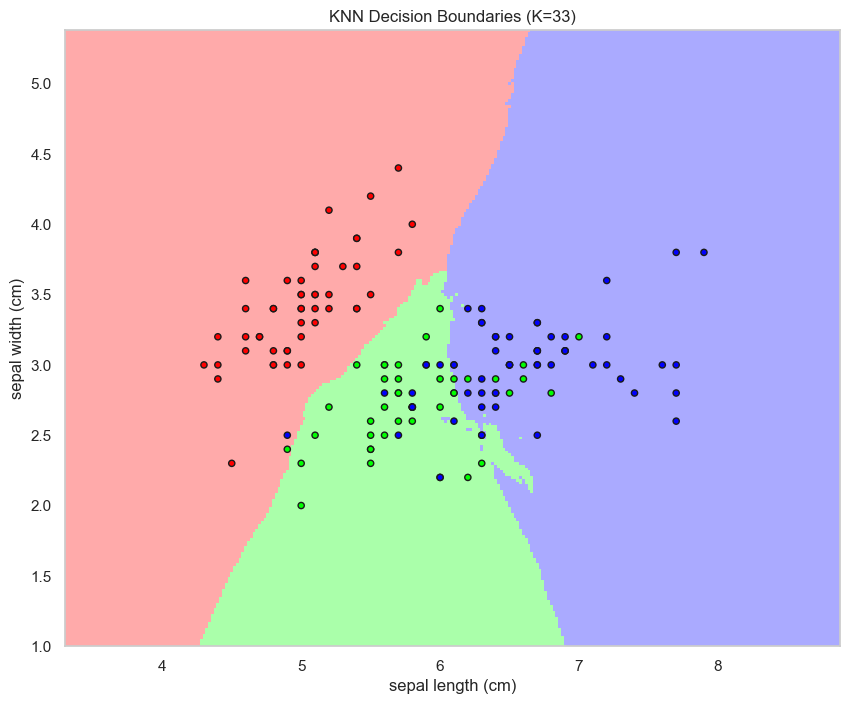

In [6]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = .02  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # We create an instance of Neighbours Classifier and fit the data.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot the decision boundaries for our final model
# Note: We use the *unscaled* X data for the plot for better interpretability of axes, but we train a new model on the *unscaled* data just for this visualization.
knn_for_plot = KNeighborsClassifier(n_neighbors=best_k)
knn_for_plot.fit(X, y) # Fit on the full, unscaled data
plot_decision_boundaries(X, y, knn_for_plot, f"KNN Decision Boundaries (K={best_k})")